In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np

In [62]:
filedir = '/home/disk/qij/AwA2/Animals_with_Attributes2'
filepath = os.path.join(filedir, 'predicate-matrix-continuous.txt')
arr = np.genfromtxt(filepath)
print(arr)
filepath2 = os.path.join(filedir, 'predicate-matrix-binary.txt')
arr2 = np.genfromtxt(filepath2)
print(arr2)

filepath = os.path.join(filedir, 'classes.txt')
class_list = []
with open(filepath, 'r') as f:
    for line in f:
        class_name = line.split('\t')[1].strip()
        class_list.append(class_name)

filepath = os.path.join(filedir, 'predicates.txt')
concept_list = []
with open(filepath, 'r') as f:
    for line in f:
        concept_name = line.split('\t')[1].strip()
        concept_list.append(concept_name)

print(concept_list)

[[-1.   -1.   -1.   ...  2.35  9.7   8.38]
 [39.25  1.39  0.   ... 58.64 20.14 11.39]
 [83.4  64.79  0.   ... 15.77 13.41 15.42]
 ...
 [63.57 43.1   0.   ... 35.95 28.26  5.  ]
 [55.31 55.46  0.   ...  5.04 18.89 72.99]
 [10.22 21.53 27.73 ...  3.96 14.05 37.98]]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 1. 1. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 1.]]
['black', 'white', 'blue', 'brown', 'gray', 'orange', 'red', 'yellow', 'patches', 'spots', 'stripes', 'furry', 'hairless', 'toughskin', 'big', 'small', 'bulbous', 'lean', 'flippers', 'hands', 'hooves', 'pads', 'paws', 'longleg', 'longneck', 'tail', 'chewteeth', 'meatteeth', 'buckteeth', 'strainteeth', 'horns', 'claws', 'tusks', 'smelly', 'flys', 'hops', 'swims', 'tunnels', 'walks', 'fast', 'slow', 'strong', 'weak', 'muscle', 'bipedal', 'quadrapedal', 'active', 'inactive', 'nocturnal', 'hibernate', 'agility', 'fish', 'meat', 'plankton', 'vegetation', 'insects', 'forager', 'g

{'color': [0, 1, 2, 3, 4, 5, 6, 7], 'pattern': [8, 9, 10], 'hair': [11, 12], 'skin': [13], 'size': [14, 15], 'fat': [16, 17], 'hand': [18, 19, 20, 21, 22], 'leg': [23], 'neck': [24], 'tail': [25], 'teeth': [26, 27, 28, 29], 'horn': [30], 'claw': [31], 'tusk': [32], 'smelly': [33], 'moves': [34, 35, 36, 37, 38], 'speed': [39, 40], 'strength': [41, 42], 'muscles': [43], 'walk': [44, 45], 'active': [46, 47], 'habbits': [48, 49, 50], 'food': [51, 52, 53, 54, 55], 'role': [56, 57, 58, 59, 60, 61], 'world': [62, 63], 'live': [64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77], 'nature': [78, 79], 'smart': [80], 'family': [81, 82], 'spot': [83, 84]} 
 {'color': ['black', 'white', 'blue', 'brown', 'gray', 'orange', 'red', 'yellow'], 'pattern': ['patches', 'spots', 'stripes'], 'hair': ['furry', 'hairless'], 'skin': ['toughskin'], 'size': ['big', 'small'], 'fat': ['bulbous', 'lean'], 'hand': ['flippers', 'hands', 'hooves', 'pads', 'paws'], 'leg': ['longleg'], 'neck': ['longneck'], 'tail': [

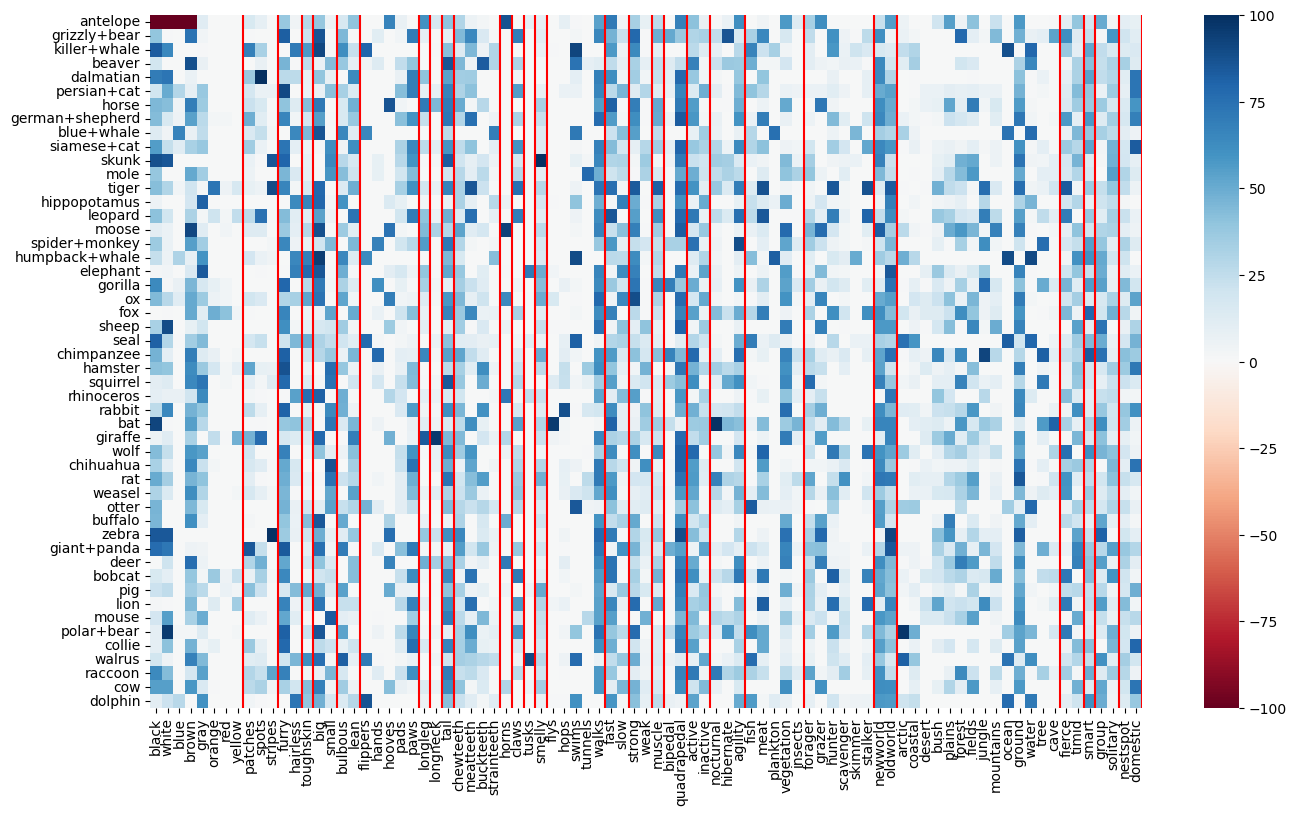

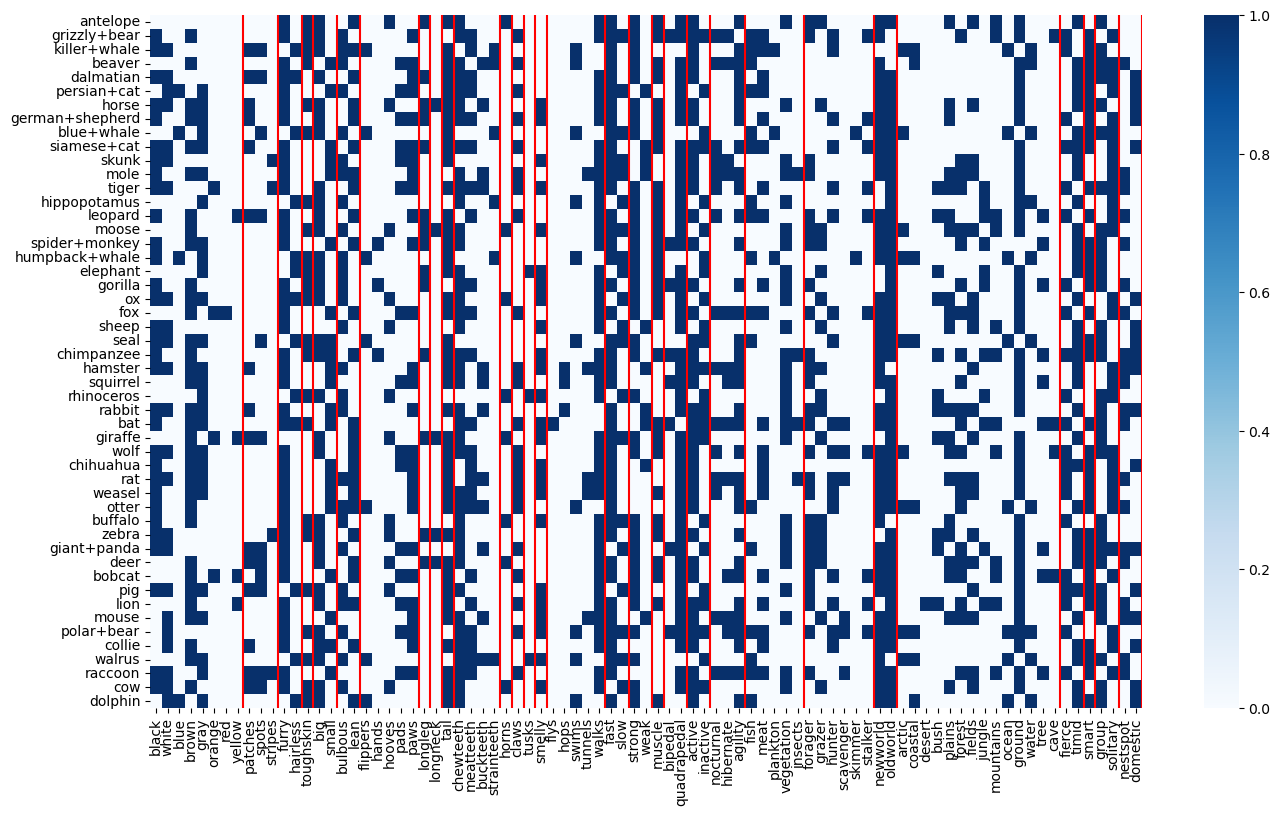

In [77]:
group_count = [8, 3, 2, 1, 2, 2, 5, 1, 1, 1, 4, 1, 1, 1, 1, 5,2,2,1, 2,2, 3,5,6,2, 14, 2,1,2,2]
group_name = ['color', 'pattern', 'hair', 'skin', 'size', 'fat', 'hand', 'leg', 'neck', 'tail', 'teeth', 'horn', 'claw', 'tusk', 'smelly', 'moves', 'speed', 'strength', 'muscles', 'walk', 'active', 'habbits', 'food', 'role', 'world', 'live','nature', 'smart', 'family', 'spot']
group_idx_dict = {}
group_name_dict = {}
checknum = 0
for i in range(len(group_name)):
    group_idx_dict[group_name[i]] = list(range(checknum, checknum + group_count[i]))
    group_name_dict[group_name[i]] = concept_list[checknum:checknum + group_count[i]]
    checknum += group_count[i]

print(group_idx_dict,'\n', group_name_dict)

import seaborn as sns
mask = (arr < 0)
arr[mask] = -100
plt.figure(figsize=(16, 9))
sns.heatmap(arr, xticklabels=concept_list, center=0, yticklabels=class_list, cmap='RdBu')

temp = 0
for idxs in group_idx_dict.values():
    idx = idxs[-1]
    plt.plot([idx+1, idx+1], [0, 50], color='red')
plt.show()

plt.figure(figsize=(16, 9))
sns.heatmap(arr2, xticklabels=concept_list, yticklabels=class_list, cmap='Blues', vmin=0, vmax=1, cbar=True)

temp = 0
for idxs in group_idx_dict.values():
    idx = idxs[-1]
    plt.plot([idx+1, idx+1], [0, 50], color='red')
plt.show()